In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from PerturbSeq_CMV.paths import DATA_DIR

In [3]:
DATA_DIR

PosixPath('/home/icb/alessandro.palma/PerturbSeq_CMV/project_folder/data')

In [29]:
folder_CRISPRi_pooled = DATA_DIR / "rawdata" / "CRISPRi_screen_host_processed"
folder_CRISPRi_perturb_host = DATA_DIR / "rawdata" / "CRISPRi_perturb_host_processed"
folder_CRISPRi_perturb_virus = DATA_DIR / "rawdata" / "CRISPRn_perturb_virus_host_processed"
folder_CRISPR_processed = DATA_DIR / "processed"

**Calculate the survival vs t0**

In [5]:
crispri_df_ratios = pd.read_excel(folder_CRISPRi_pooled / "CRISPR_host_factors.xlsx", header=0, sheet_name=1)

In [6]:
crispri_df_ratios

,Unnamed: 0,Unnamed: 1,Unnamed: 2,uninfected/t0,uninfected/t0.1,uninfected/t0.2,surviving/t0,surviving/t0.1,surviving/t0.2,surviving/uninfected,...,surviving/t0.6,surviving/t0.7,surviving/t0.8,surviving/t0.9,surviving/t0.10,surviving/t0.11,surviving/t0.12,surviving/t0.13,surviving/t0.14,surviving/t0.15
0,NaN,NaN,NaN,norm. log2 ratio,norm. log2 ratio,norm. log2 ratio,norm. log2 ratio,norm. log2 ratio,norm. log2 ratio,norm. log2 ratio,...,MAGeCK output,MAGeCK output,MAGeCK output,MAGeCK output,MAGeCK output,MAGeCK output,MAGeCK output,MAGeCK output,MAGeCK output,MAGeCK output
1,Gene,Transcript,header,Rep1,Rep2,avg,Rep1,Rep2,avg,Rep1,...,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
2,A1BG,P1,A1BG_P1,0.107214,0.035527,0.071371,0.233776,-0.173066,0.030355,0.126562,...,1,5035,3,-0.24567,0.04113,0.11865,0.99014,2470,2,-0.24567
3,A1BG,P2,A1BG_P2,0.318301,-0.025298,0.146502,0.26583,0.267195,0.266512,-0.052471,...,1,18258,0,0.26197,0.060302,0.15618,1,3209,3,0.26197
4,A1CF,P1P2,A1CF_P1P2,0.272956,0.383934,0.328445,0.123543,0.087144,0.105343,-0.149413,...,1,16223,1,0.26118,0.073689,0.17837,1,3654,3,0.26118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,ZYG11A,P1P2,ZYG11A_P1P2,-0.060299,-0.377682,-0.218991,0.362154,0.28097,0.321562,0.422453,...,1,12535,1,0.18364,0.002432,0.010511,0.596243,363,3,0.18364
20526,ZYG11B,P1P2,ZYG11B_P1P2,0.368935,0.239663,0.304299,-0.190333,0.254767,0.032217,-0.559268,...,1,17160,0,-0.003091,0.28972,0.4599,1,9246,1,-0.003091
20527,ZYX,P1P2,ZYX_P1P2,-0.1119,-0.382553,-0.247226,0.026914,-0.469225,-0.221155,0.138813,...,1,3366,3,-0.16941,0.95414,0.95419,1,19405,0,-0.16941
20528,ZZEF1,P1P2,ZZEF1_P1P2,0.270258,-0.06827,0.100994,0.074481,-0.320237,-0.122878,-0.195777,...,1,8732,1,0.12373,0.43444,0.58617,1,11841,2,0.12373


Colnames zipped

In [7]:
zipped_colnames = list(zip(crispri_df_ratios.columns, 
         crispri_df_ratios.loc[1],
         crispri_df_ratios.loc[0]))

Put together zipped files 

In [8]:
keys = []
for key in zipped_colnames:
    key_updated = []
    for elem in key:
        elem = re.sub(r"\.\d*|nan|Unnamed\: \d" , "", str(elem))
        if elem!= "":
            key_updated.append(elem)
    if len(key_updated)>1:
        keys.append("_".join(key_updated))
    else: 
        keys.append("".join(key_updated))
    

In [9]:
crispri_df_ratios = crispri_df_ratios.drop(0)
crispri_df_ratios = crispri_df_ratios.drop(1)
crispri_df_ratios = crispri_df_ratios.reset_index(drop=True)
crispri_df_ratios.columns = keys

In [10]:
crispri_df_ratios

,Gene,Transcript,header,uninfected/t0_Rep1_norm log2 ratio,uninfected/t0_Rep2_norm log2 ratio,uninfected/t0_avg_norm log2 ratio,surviving/t0_Rep1_norm log2 ratio,surviving/t0_Rep2_norm log2 ratio,surviving/t0_avg_norm log2 ratio,surviving/uninfected_Rep1_norm log2 ratio,...,surviving/t0_neg|fdr_MAGeCK output,surviving/t0_neg|rank_MAGeCK output,surviving/t0_neg|goodsgrna_MAGeCK output,surviving/t0_neg|lfc_MAGeCK output,surviving/t0_pos|score_MAGeCK output,surviving/t0_pos|p-value_MAGeCK output,surviving/t0_pos|fdr_MAGeCK output,surviving/t0_pos|rank_MAGeCK output,surviving/t0_pos|goodsgrna_MAGeCK output,surviving/t0_pos|lfc_MAGeCK output
0,A1BG,P1,A1BG_P1,0.107214,0.035527,0.071371,0.233776,-0.173066,0.030355,0.126562,...,1,5035,3,-0.24567,0.04113,0.11865,0.99014,2470,2,-0.24567
1,A1BG,P2,A1BG_P2,0.318301,-0.025298,0.146502,0.26583,0.267195,0.266512,-0.052471,...,1,18258,0,0.26197,0.060302,0.15618,1,3209,3,0.26197
2,A1CF,P1P2,A1CF_P1P2,0.272956,0.383934,0.328445,0.123543,0.087144,0.105343,-0.149413,...,1,16223,1,0.26118,0.073689,0.17837,1,3654,3,0.26118
3,A2M,P1P2,A2M_P1P2,-0.09212,-0.051271,-0.071696,-0.30039,-0.338228,-0.319309,-0.20827,...,0.752388,846,4,-0.28373,0.99086,0.99092,1,20288,0,-0.28373
4,A2ML1,P1P2,A2ML1_P1P2,0.124342,0.203546,0.163944,-0.279614,0.378132,0.049259,-0.403956,...,1,9745,2,0.34679,0.034895,0.10281,0.974505,2158,3,0.34679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20523,ZYG11A,P1P2,ZYG11A_P1P2,-0.060299,-0.377682,-0.218991,0.362154,0.28097,0.321562,0.422453,...,1,12535,1,0.18364,0.002432,0.010511,0.596243,363,3,0.18364
20524,ZYG11B,P1P2,ZYG11B_P1P2,0.368935,0.239663,0.304299,-0.190333,0.254767,0.032217,-0.559268,...,1,17160,0,-0.003091,0.28972,0.4599,1,9246,1,-0.003091
20525,ZYX,P1P2,ZYX_P1P2,-0.1119,-0.382553,-0.247226,0.026914,-0.469225,-0.221155,0.138813,...,1,3366,3,-0.16941,0.95414,0.95419,1,19405,0,-0.16941
20526,ZZEF1,P1P2,ZZEF1_P1P2,0.270258,-0.06827,0.100994,0.074481,-0.320237,-0.122878,-0.195777,...,1,8732,1,0.12373,0.43444,0.58617,1,11841,2,0.12373


<AxesSubplot: xlabel='surviving/t0_avg_norm log2 ratio', ylabel='uninfected/t0_avg_norm log2 ratio'>

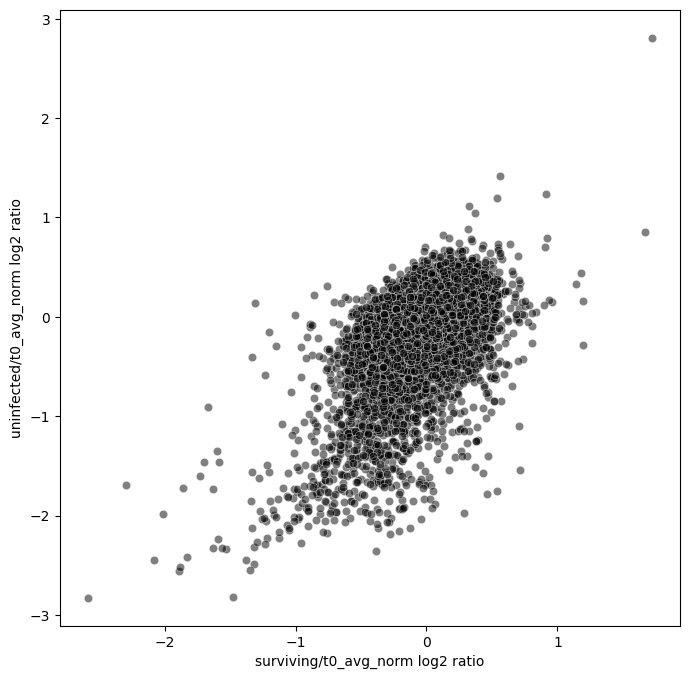

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=crispri_df_ratios, x="surviving/t0_avg_norm log2 ratio",
               y="uninfected/t0_avg_norm log2 ratio", color="black", alpha=0.5
               )

**Overlay the genes from host PerturbSeq to see if reproducible**

Add the selected genes to the CRISPRi df

In [23]:
genes_CRISPRi_host_screen = pd.read_excel(folder_CRISPRi_perturb_host / "CRISPRi_perturb_host_processed.xlsx")

In [24]:
selected_genes_host_screen = np.unique(genes_CRISPRi_host_screen.guide_target)

In [25]:
crispri_df_ratios["selected"] = False
crispri_df_ratios.loc[crispri_df_ratios.Gene.isin(selected_genes_host_screen),"selected"] = True

In [26]:
np.unique(crispri_df_ratios.selected, return_counts=True)

(array([False,  True]), array([20472,    56]))

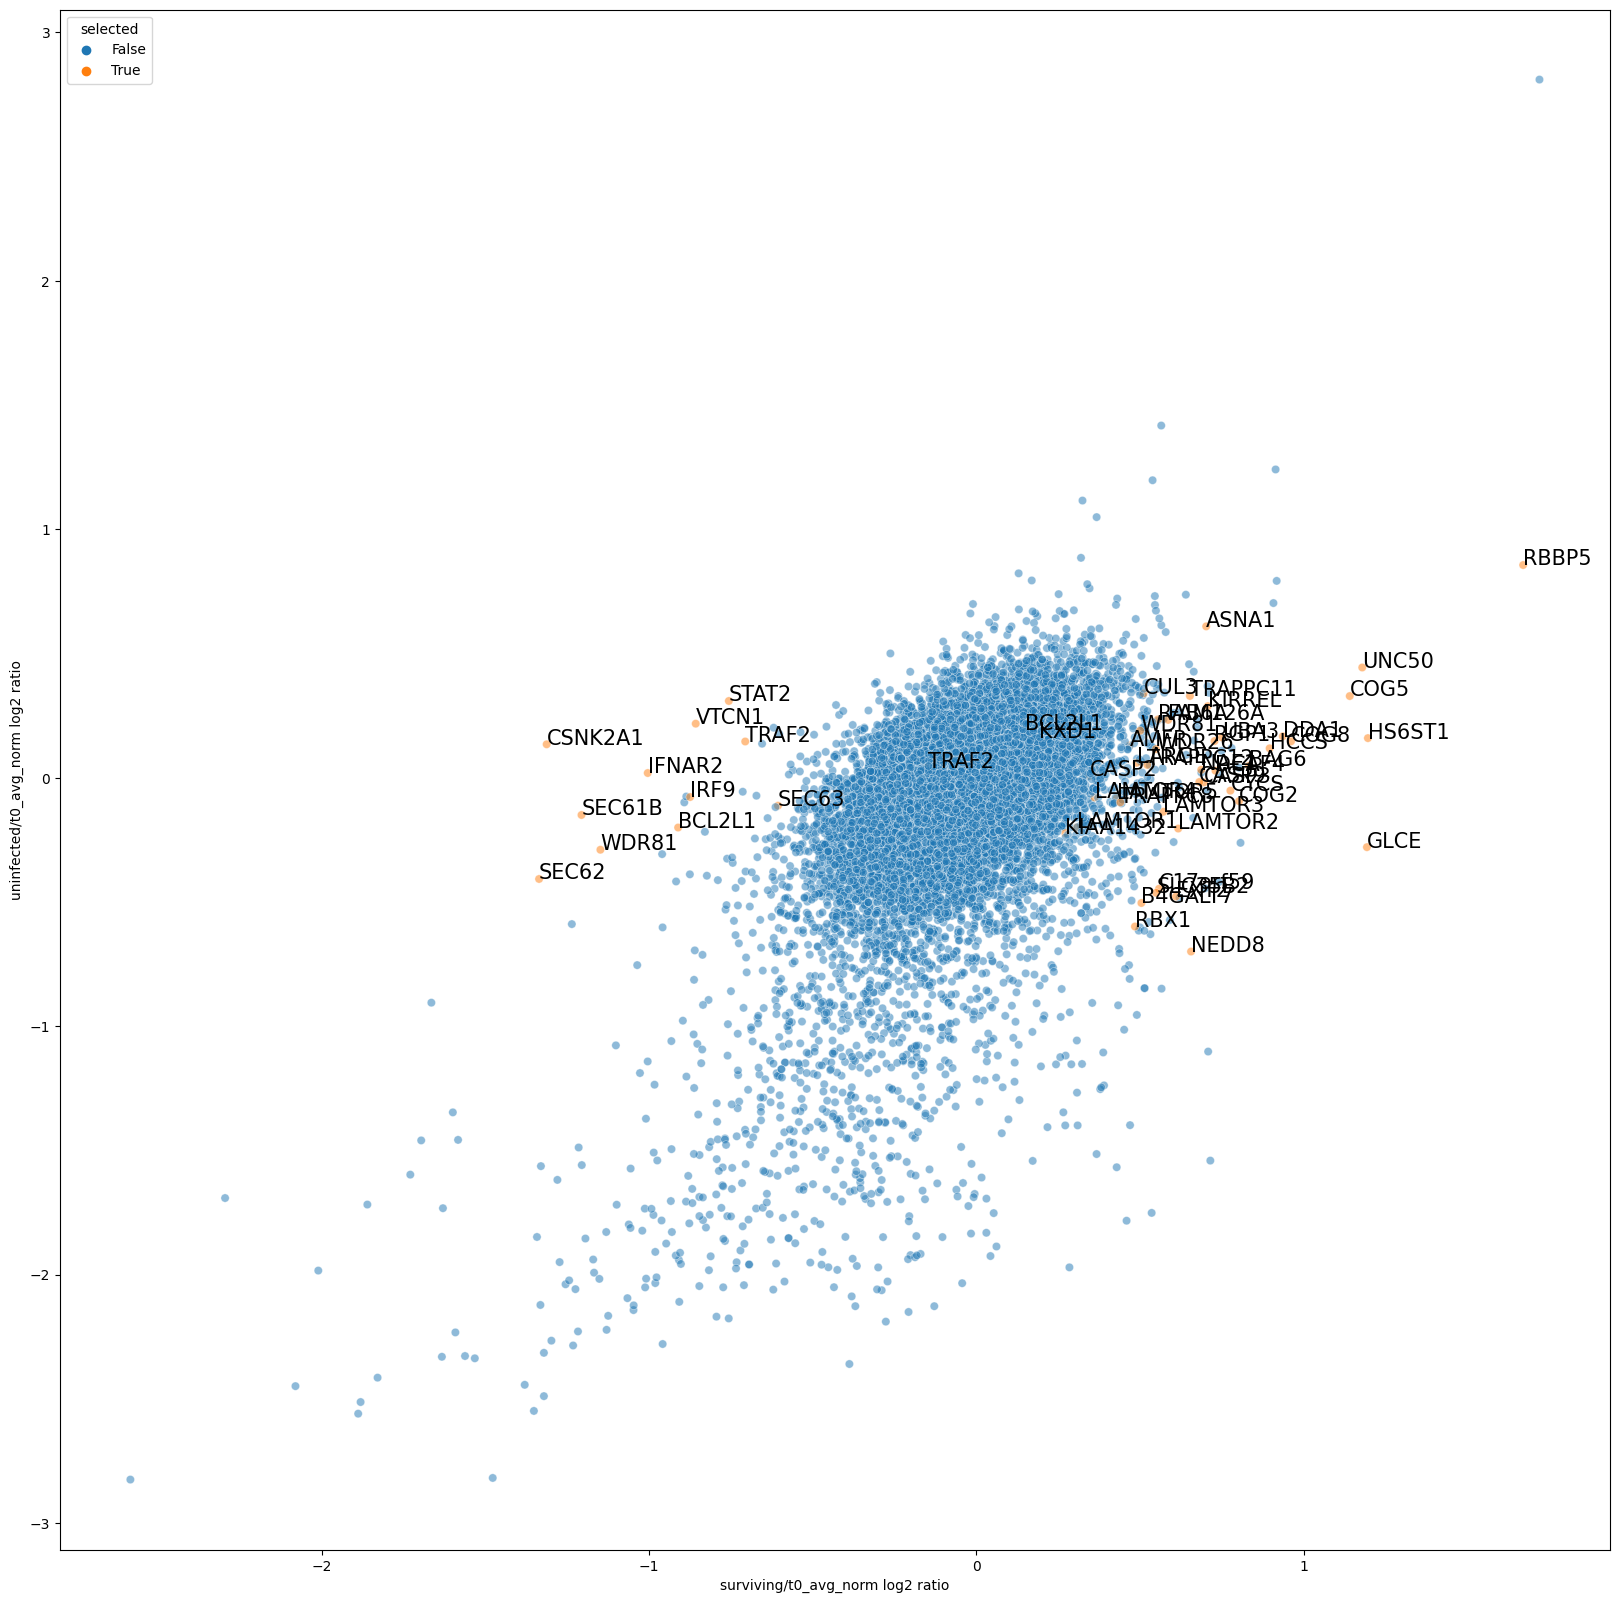

In [27]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=crispri_df_ratios, x="surviving/t0_avg_norm log2 ratio",
               y="uninfected/t0_avg_norm log2 ratio", alpha=0.5,
               hue="selected")

subset_selected = crispri_df_ratios.loc[crispri_df_ratios.selected==True] 
for t in range(len(subset_selected)):
    plt.text(x=list(subset_selected["surviving/t0_avg_norm log2 ratio"])[t],
            y=list(subset_selected["uninfected/t0_avg_norm log2 ratio"])[t], 
            s=list(subset_selected["Gene"])[t], fontsize=15)

**Save the file**

In [30]:
crispri_df_ratios.to_csv(folder_CRISPR_processed / "CRISPRi_host_factors.csv")